# <span style="color:rgb(77, 184, 255)">Predicting house prices</span>

There are several factors that impact the overall price of the house, some of those factors are more tangible as the quality of the house or the overall size (area) of the house and other factors are more intrinsic such as the performance of the economy. Coming with an accurate model that predicts with such precision the actual value is an arduous task since there are both internal and external factors that will affect the price of a single house. Nevertheless, what we can do is detect those features that carry a heavier weight on the overall output (Price of the house).  
In order to perform an extensive analysis of this data we should explore our data, this means getting a sense of what is the story behind the data.

In this project we will go through several steps of data science process:  
<span style="color:rgb(57, 172, 115)">1. Frame the problem  
2. Obtaining data  
3. Data processing  
4. Exploratory data analysis (Visualizations)  
5. Perform in-depth data analysis  </span> 


We chose this topic for the project because we have personal interest in it, in the last 6 months we are searching for a house to buy, and we could really use a model to predict the price of a house so we could buy it before its price goes up.  

##### additional information:  
in the git repo you can also find:
- Data_description.txt - this file contains information about all the featers in the dataset
- train.csv file - this file is the dataset  
<img src="images/house price image.jpg" alt="drawing" width="200"/>


## <span style="color:rgb(57, 172, 115)">1. Frame the problem </span>

#### Can you predict the price of a house based on the house parameters and previous information about house sale prices ?

## <span style="color:rgb(57, 172, 115)">2. Obtaining data </span>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec
import missingno as msno
import scipy.stats as stats 
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("train.csv")

### Explore and understand the data of the train dataset:

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train_df.shape

(1460, 81)

##### Exploring the types and values of the data 

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## <span style="color:rgb(57, 172, 115)">3. Data Processing</span>

### Checking for Missing Values

In [8]:
train_df[train_df.isnull().any(axis=1)].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
np.sum(train_df.isnull().any(axis=1))

1460

##### Count the missing values per column in train_df

In [10]:
NANColumns=[]
i=-1
for a in train_df.isnull().sum():
    i+=1
    if a!=0:
        print(train_df.columns[i],a)
        NANColumns.append(train_df.columns[i])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


#### A histograms of all the columns where we can check the distribution of values count for each column 

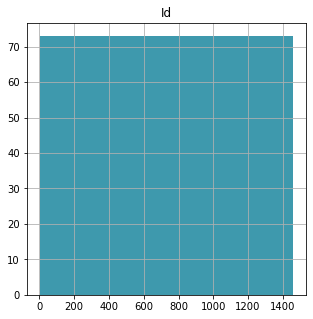

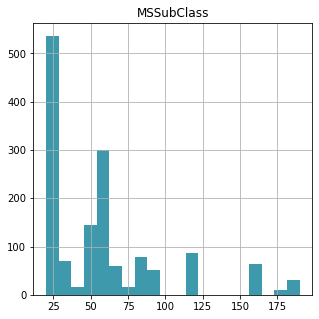

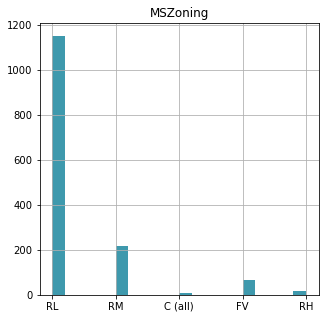

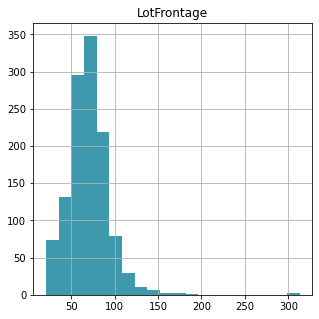

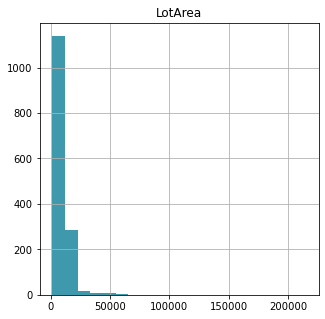

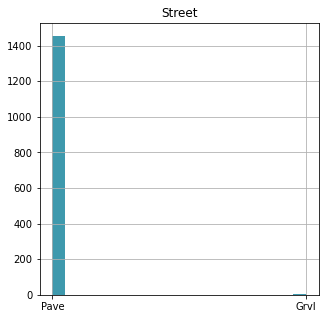

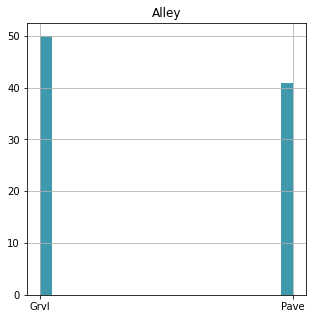

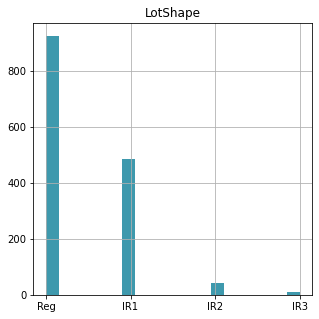

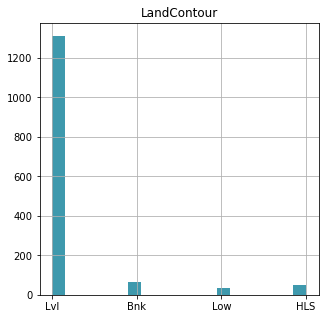

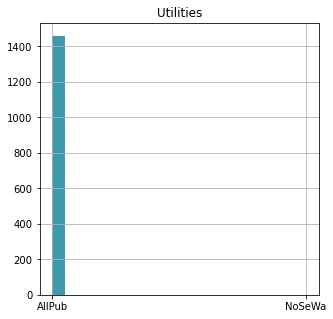

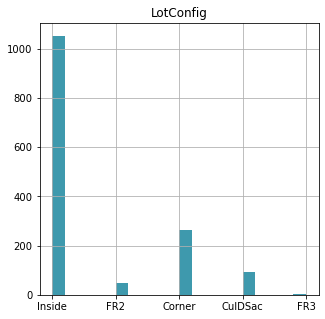

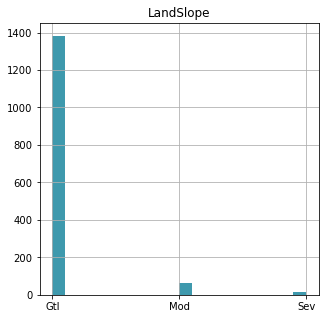

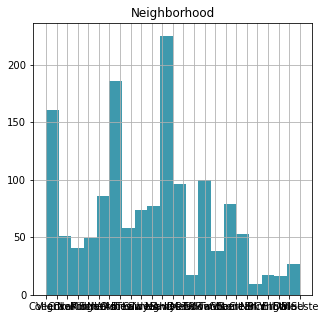

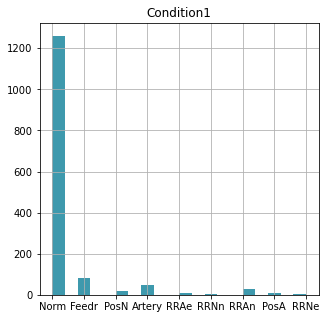

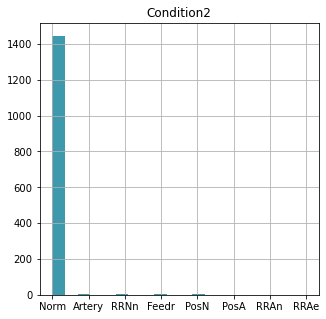

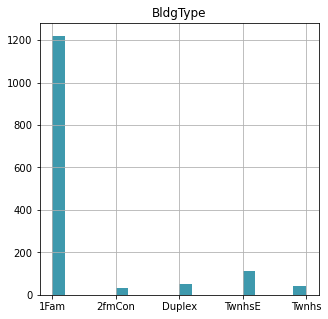

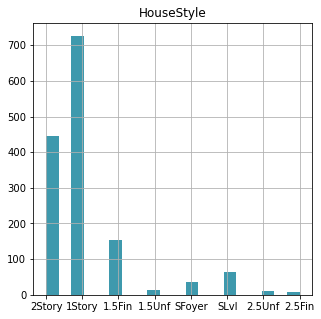

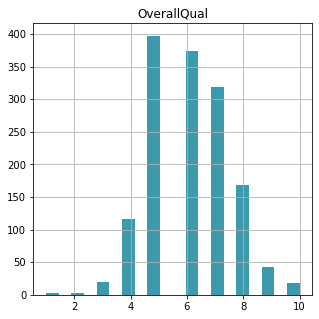

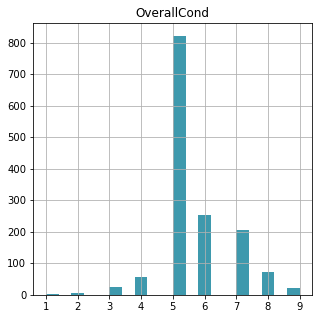

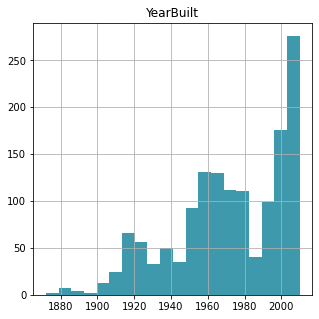

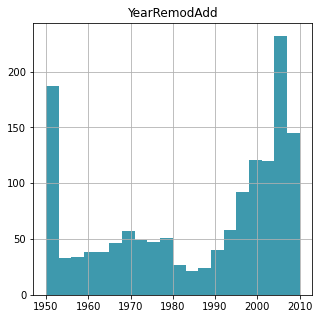

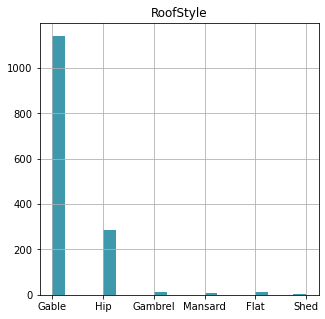

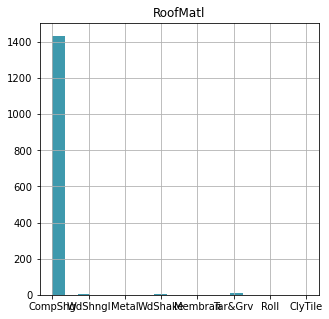

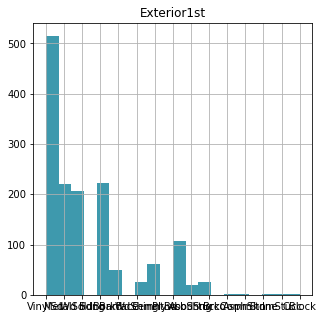

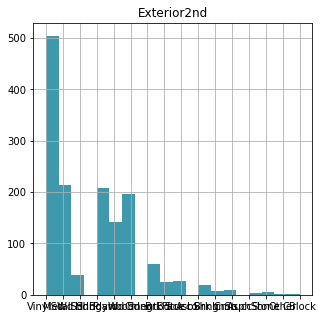

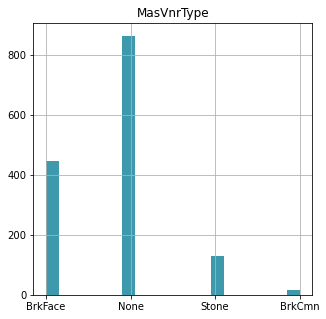

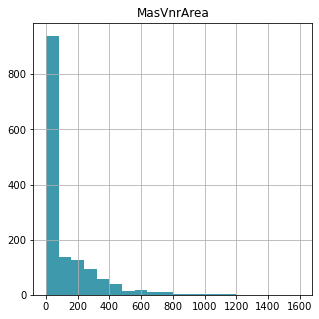

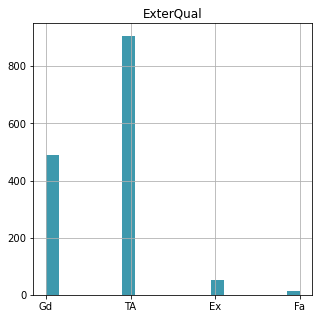

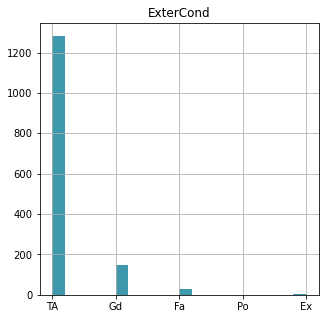

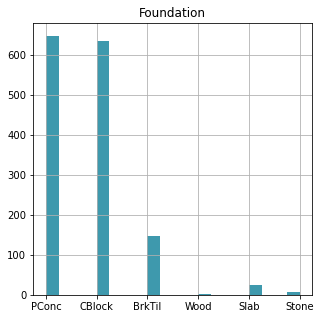

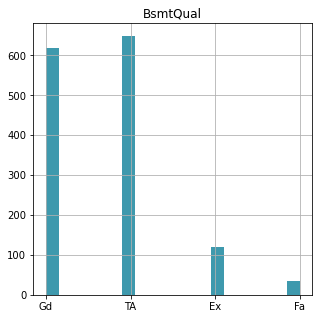

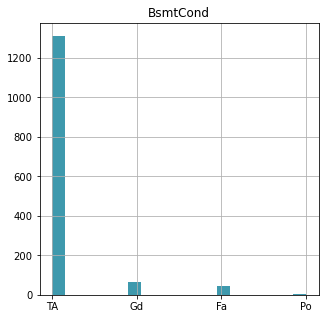

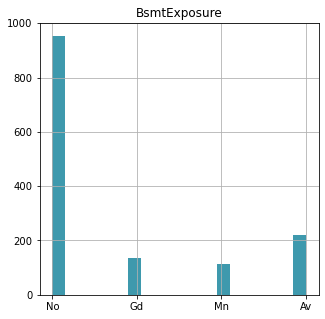

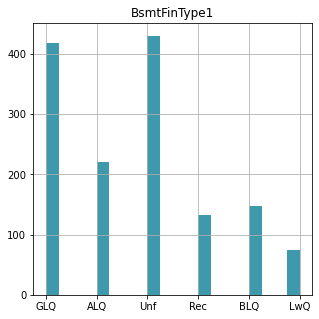

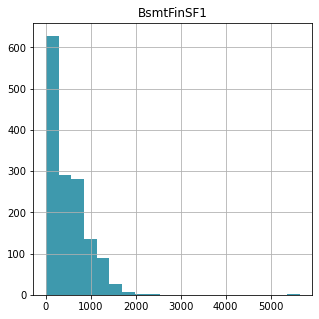

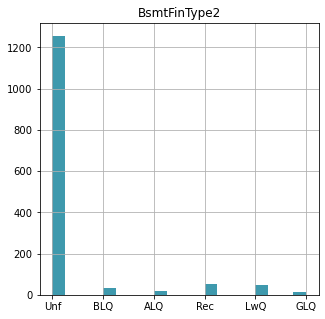

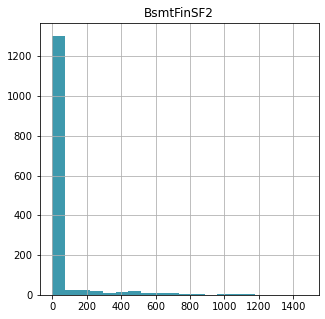

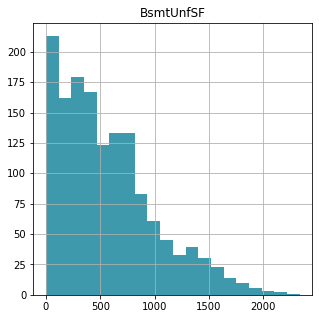

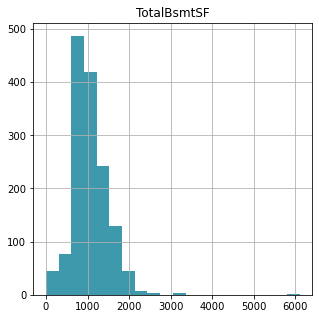

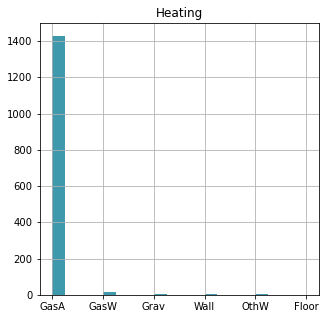

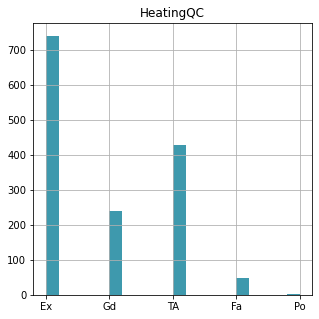

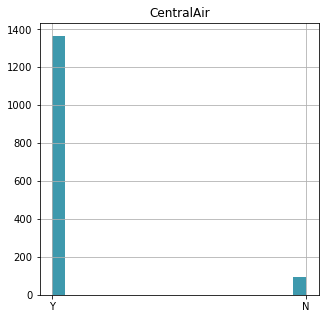

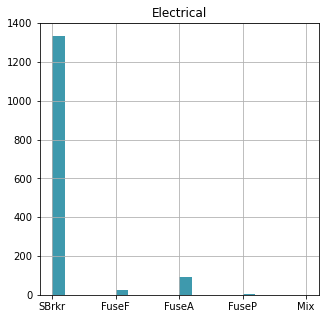

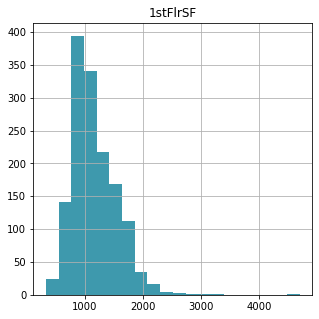

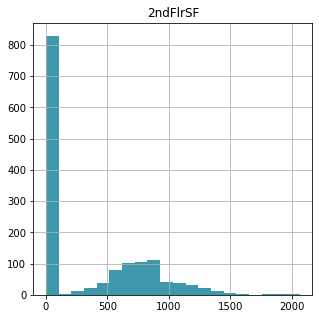

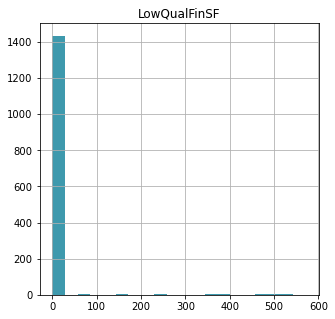

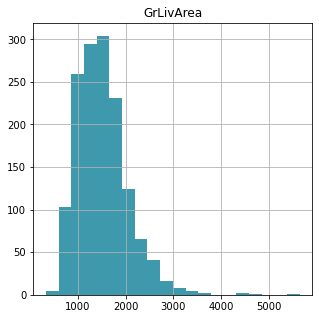

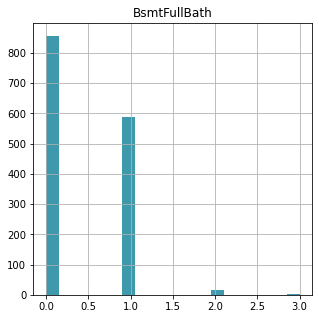

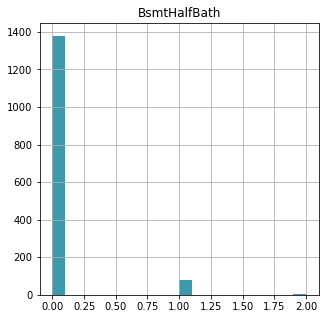

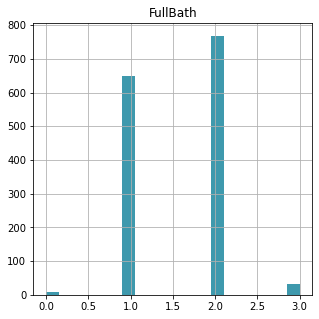

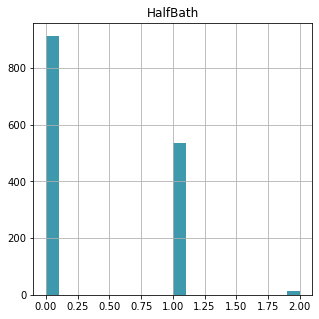

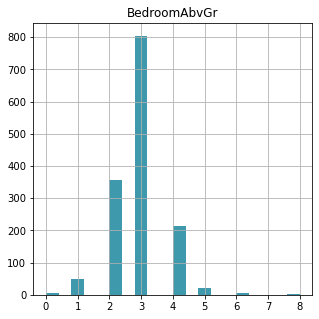

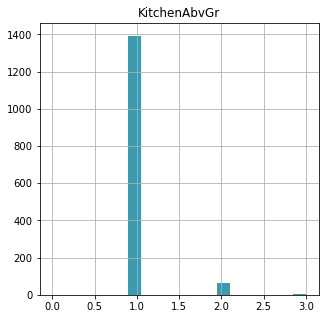

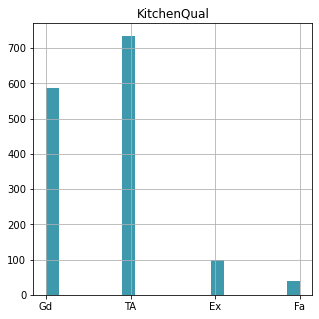

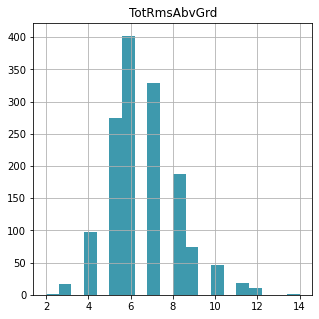

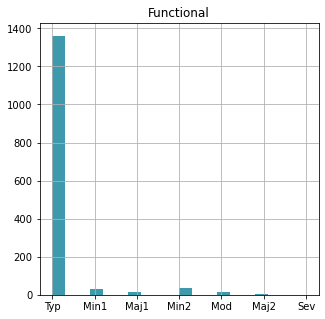

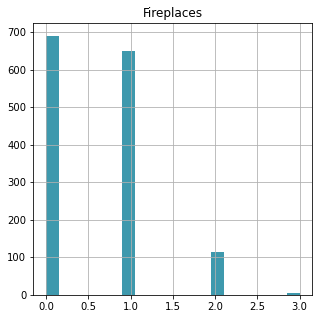

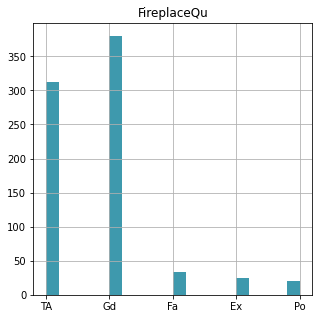

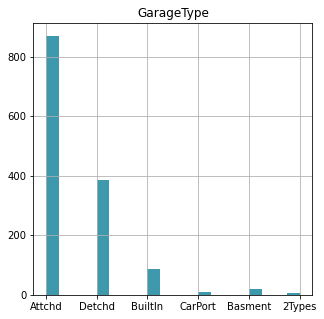

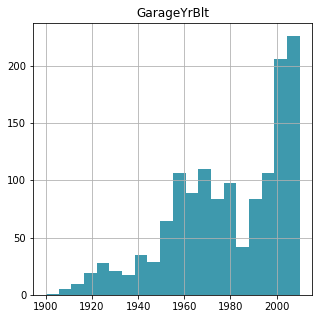

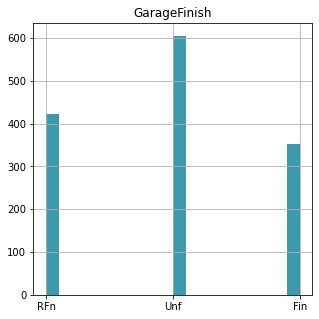

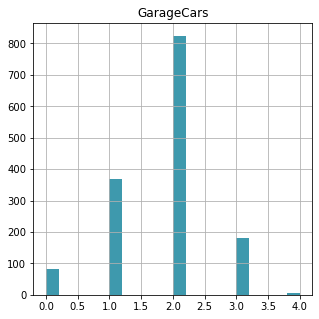

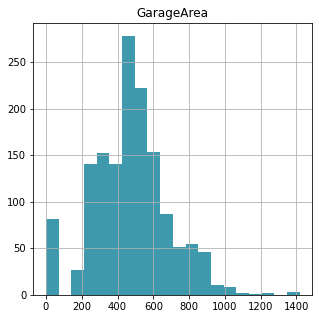

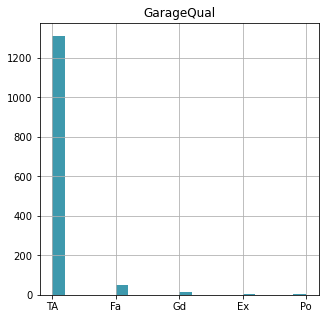

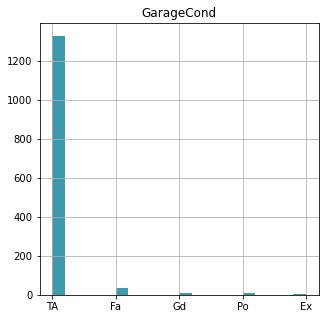

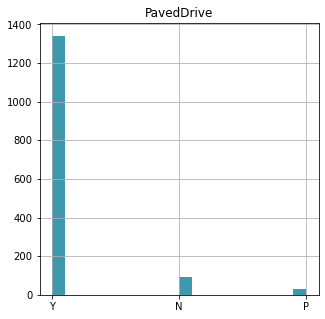

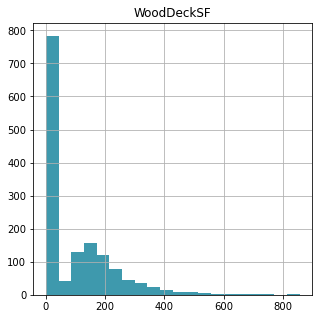

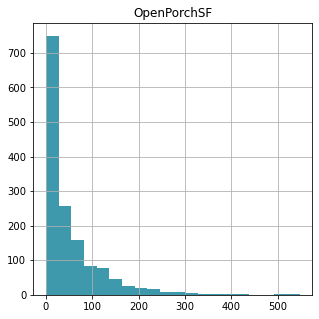

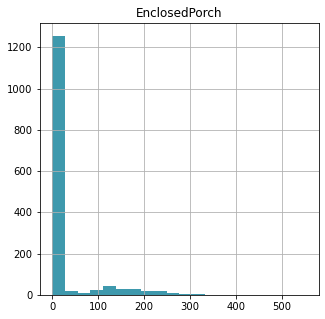

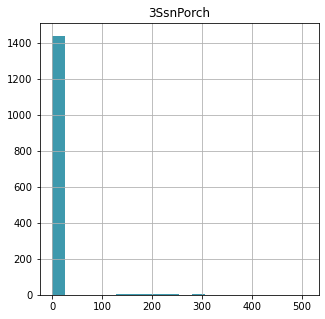

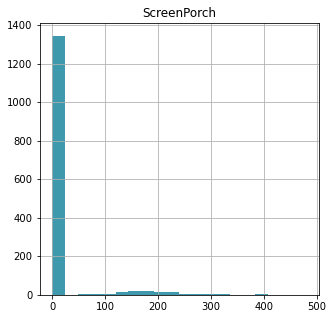

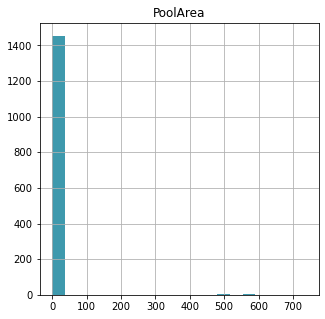

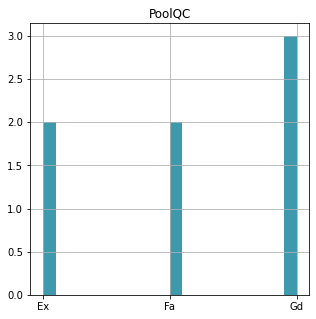

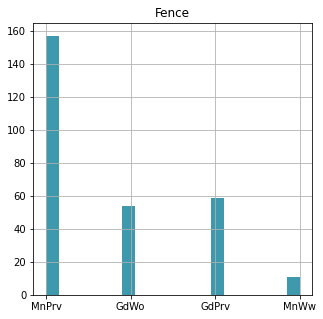

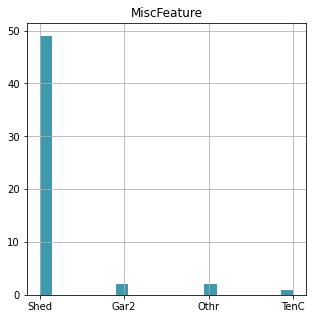

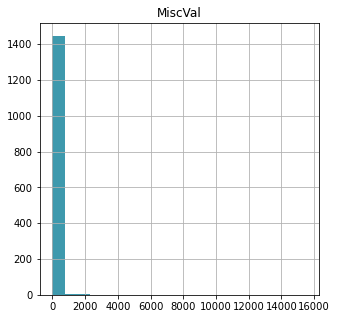

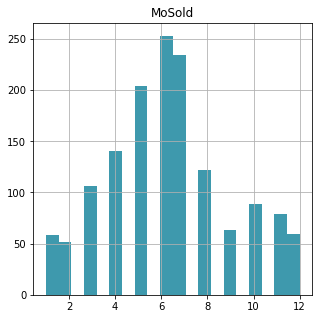

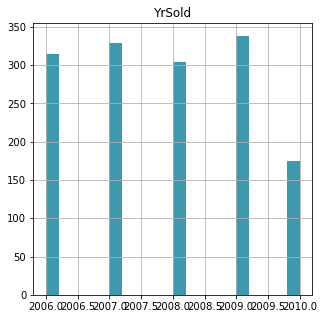

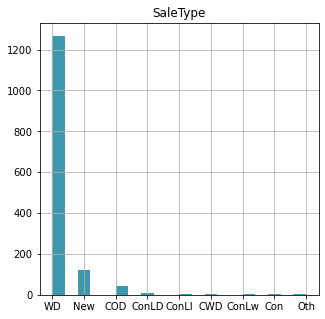

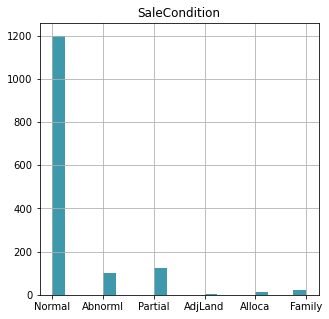

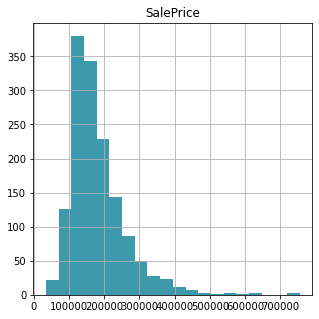

In [11]:
for col in train_df.columns:
    train_df[col].hist(figsize=(5,5),bins = 20, color="#3e99ad")
    plt.title(col)
    plt.show()

### searching for correlation between some features to the SlaePrice feature

#### Searching for Temporal data
(Temporal data is a feature that changes over time)

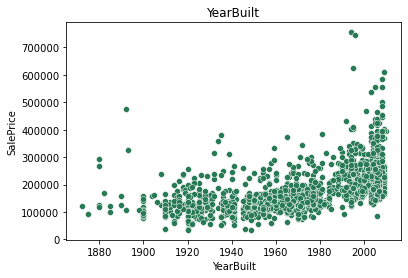

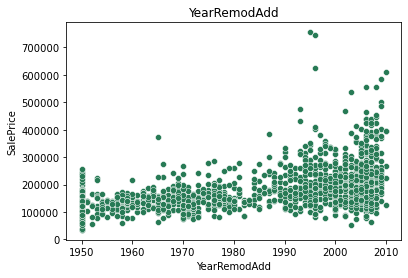

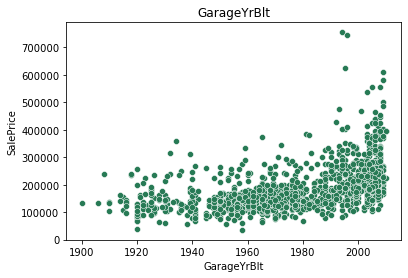

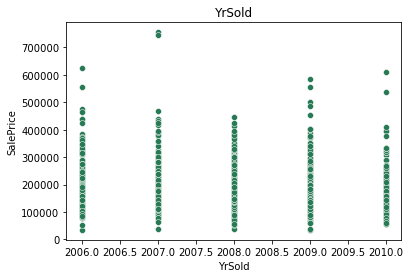

In [12]:
t_features = [feat for feat in train_df if "Year" in feat or "Yr" in feat]
color = ["#277a55"]
for feature in t_features:
    sns.scatterplot(x=feature,y="SalePrice",data=train_df, c=color)
    plt.title(feature)
    plt.show()

<span style="color:rgb(255, 77, 77)">As we can see from the graphs YearBuilt and GarageYrBlt have stong correlation with SalePrice</span>

##### Locking for the unique features
Unique feature is a feature that has less than 6 unique values

In [13]:
unique_features = [feature for feature in train_df if train_df[feature].nunique() < 6 and feature not in t_features]
other_features = [feature for feature in train_df if feature not in unique_features and feature not in t_features]

print("Unique_features:\n",unique_features)
print("Other_features:\n",other_features)

Unique_features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']
Other_features:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPo

##### scatterplot for each unique_feature against SalePrice

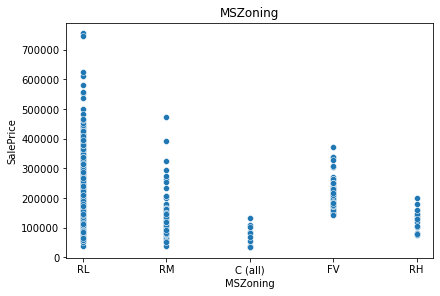

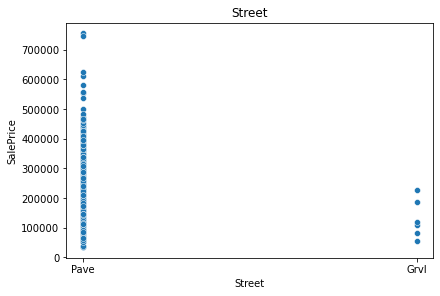

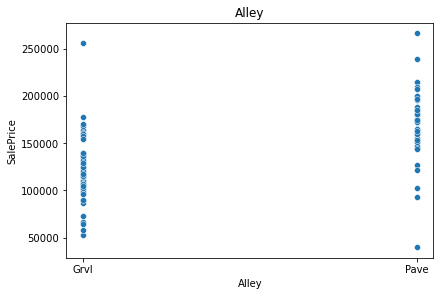

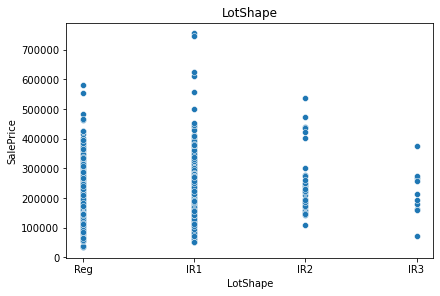

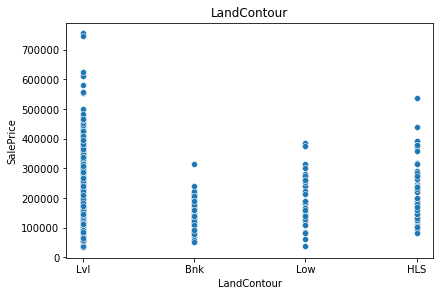

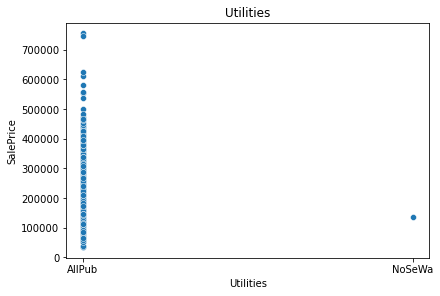

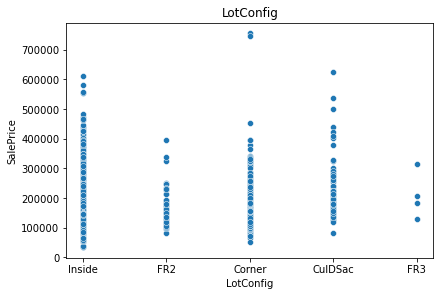

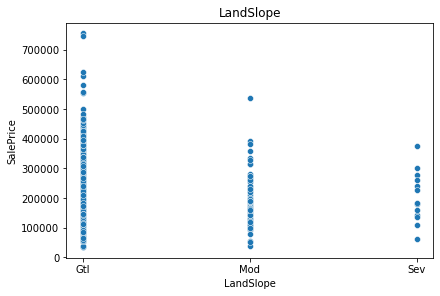

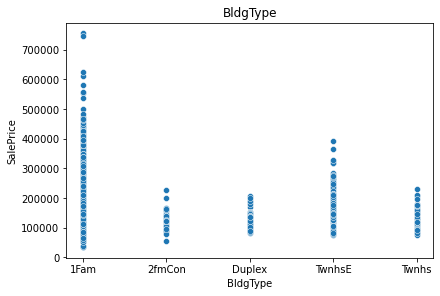

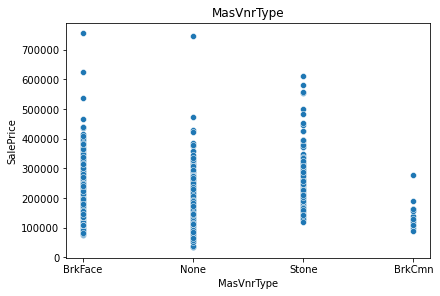

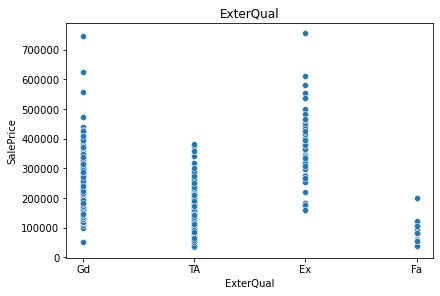

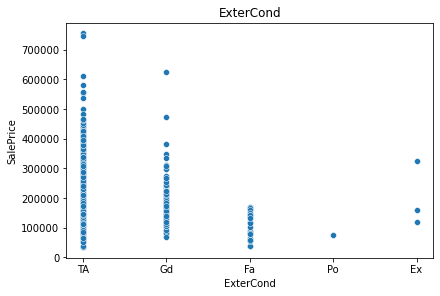

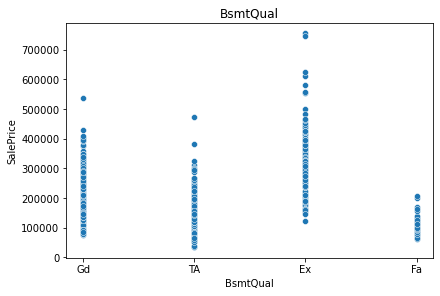

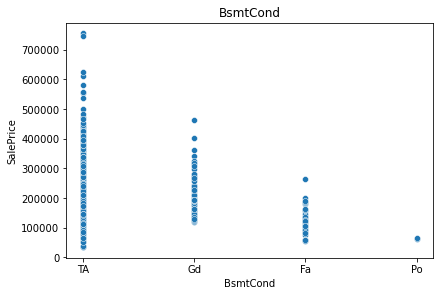

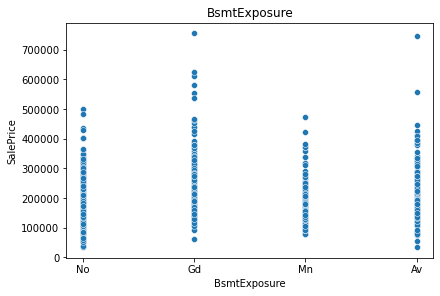

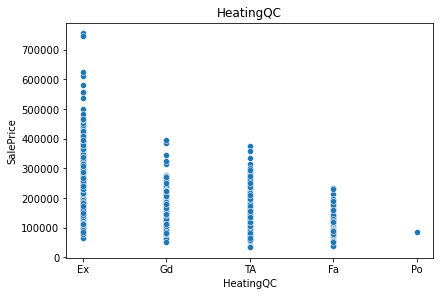

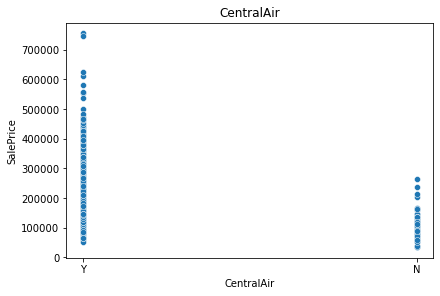

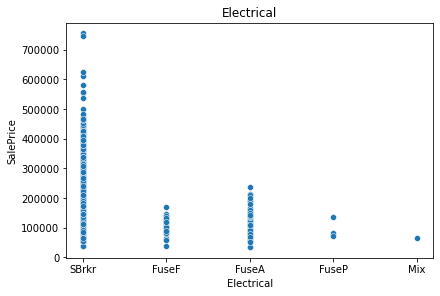

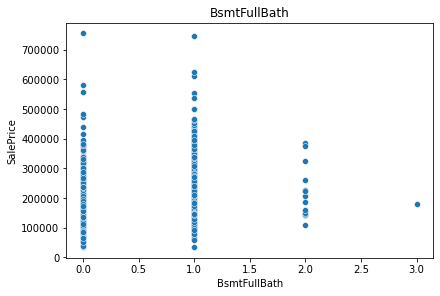

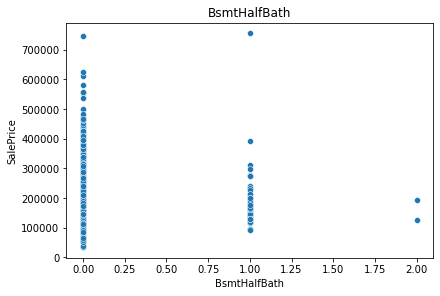

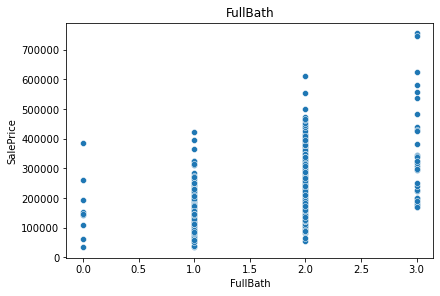

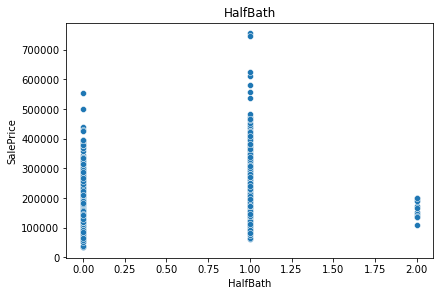

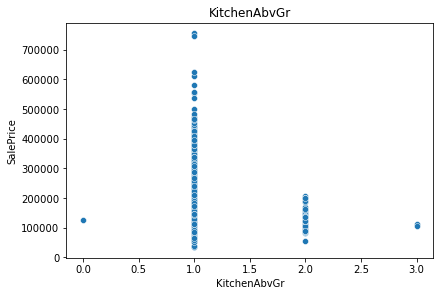

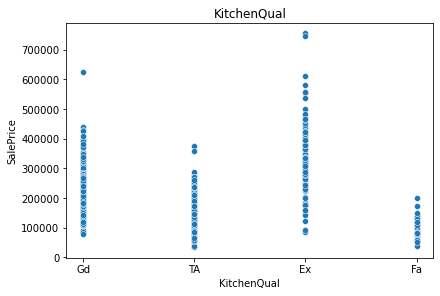

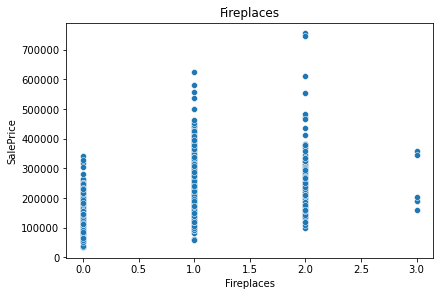

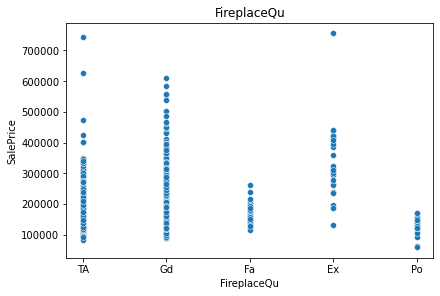

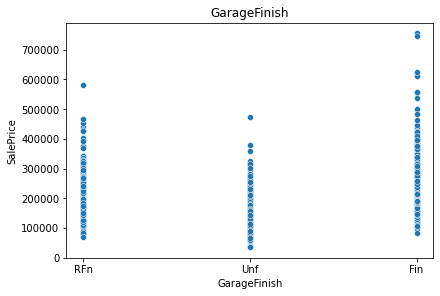

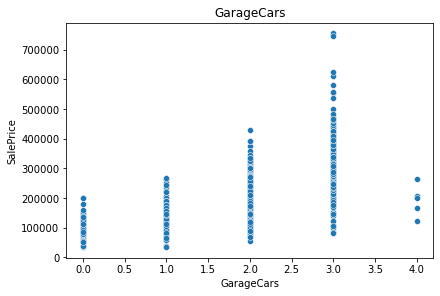

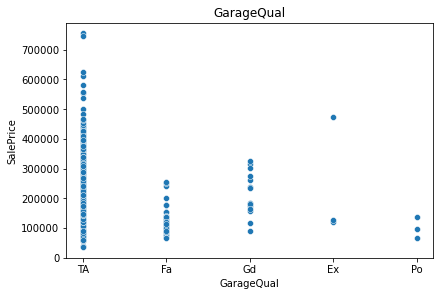

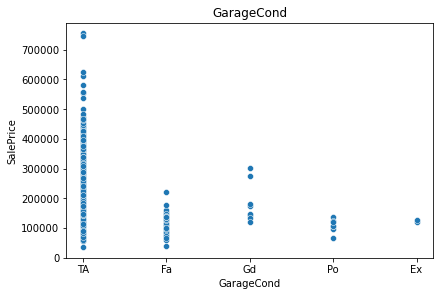

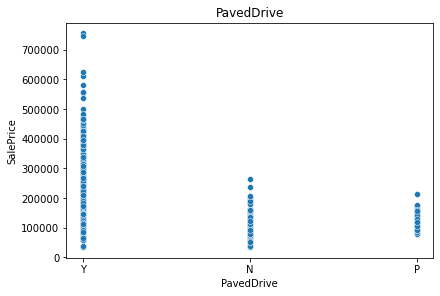

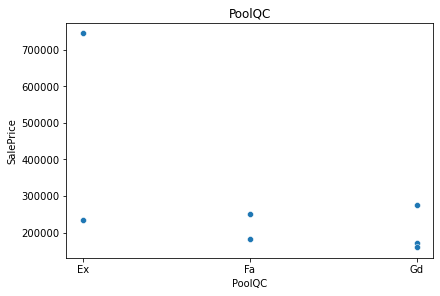

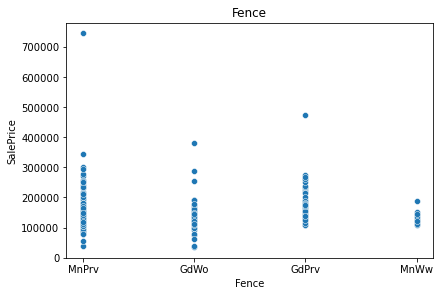

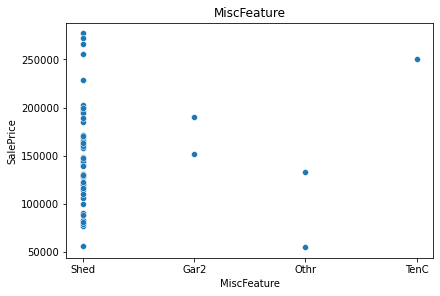

In [14]:
def scatterplot(df,feature,target_feature):
    plt.figure(constrained_layout=True)
    sns.scatterplot(df[feature],df[target_feature])
    plt.title(feature)
    plt.show()
for feat in unique_features:
    scatterplot(train_df,feat,"SalePrice")

<span style="color:rgb(255, 77, 77)">As we can see from the graphs: FullBath and GarageCars have stong correlation with SalePrice</span>

##### scatterplot for each other_feature against SalePrice

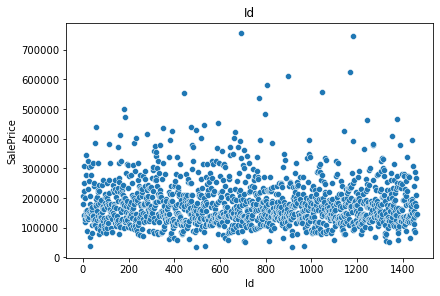

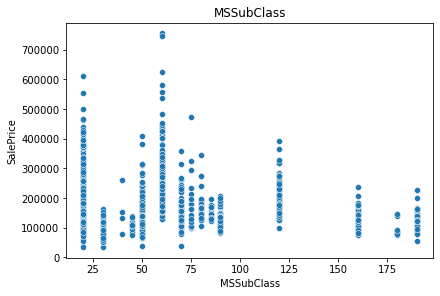

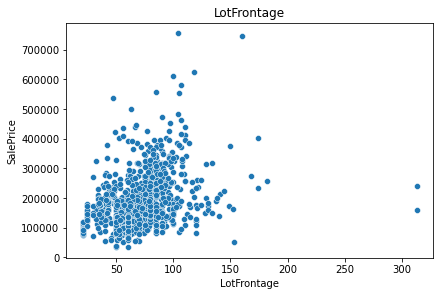

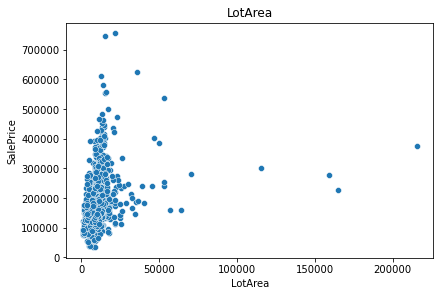

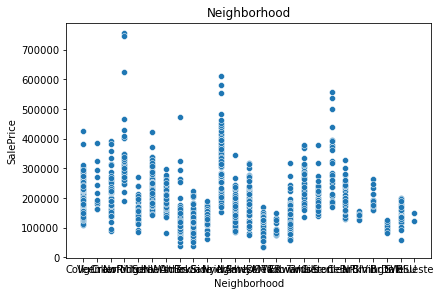

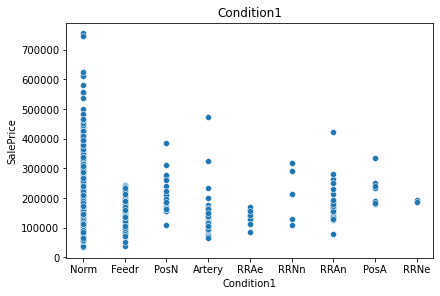

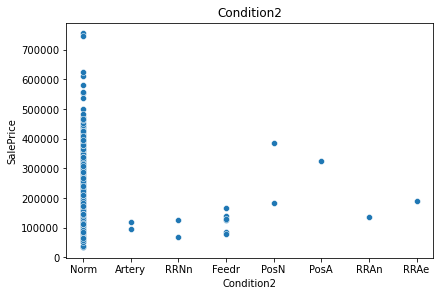

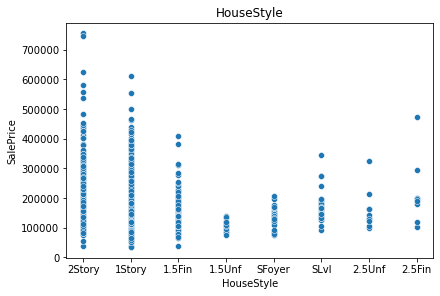

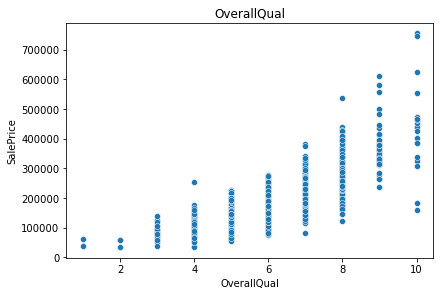

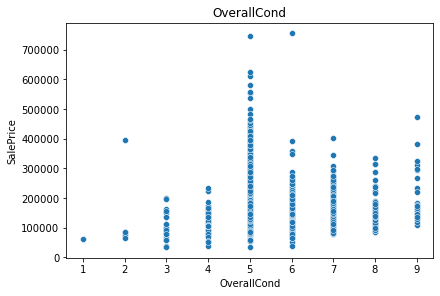

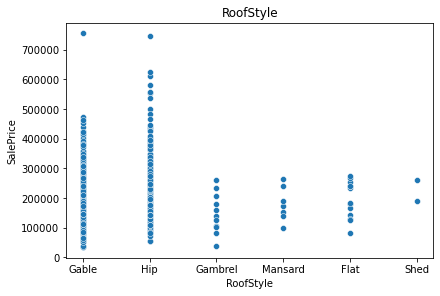

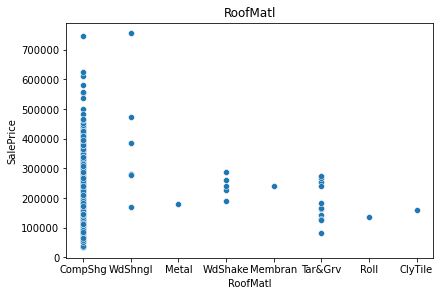

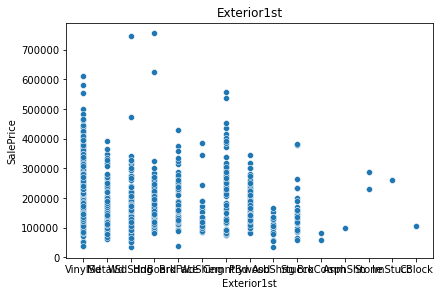

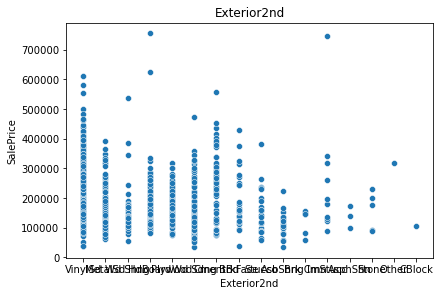

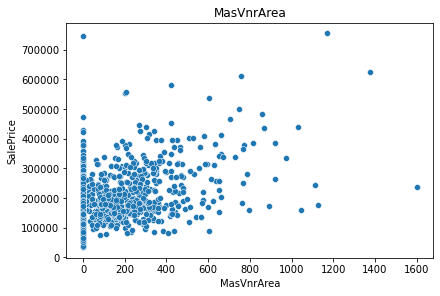

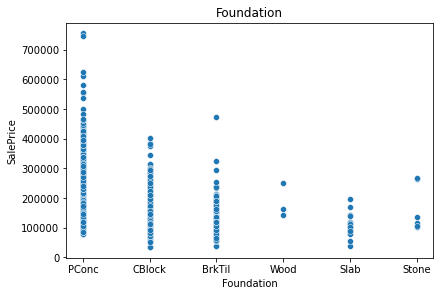

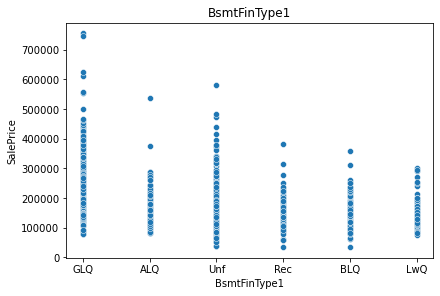

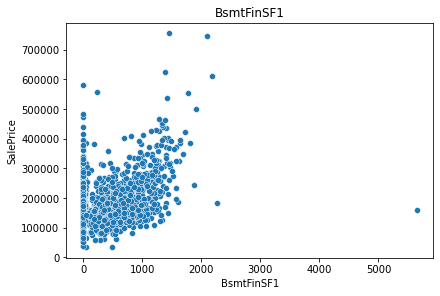

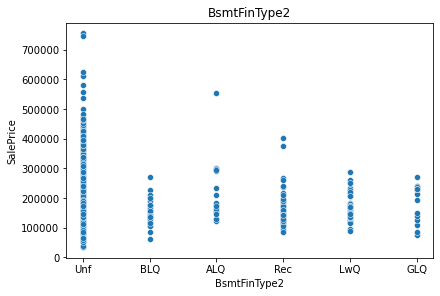

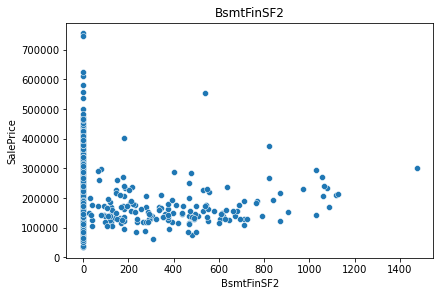

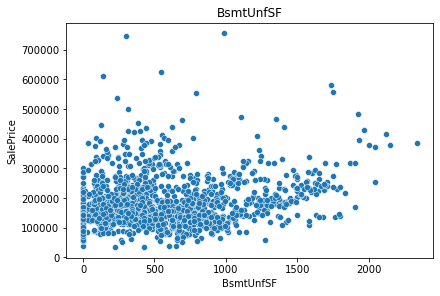

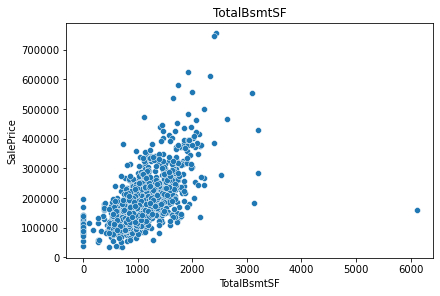

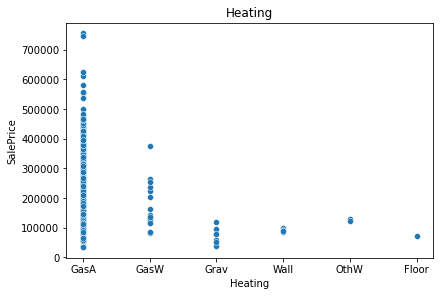

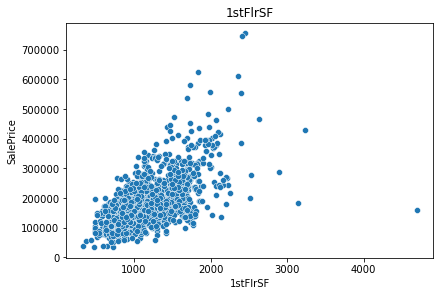

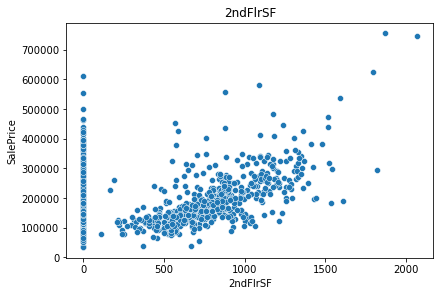

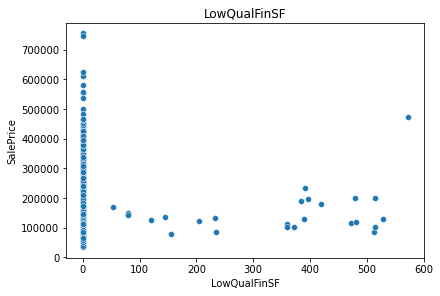

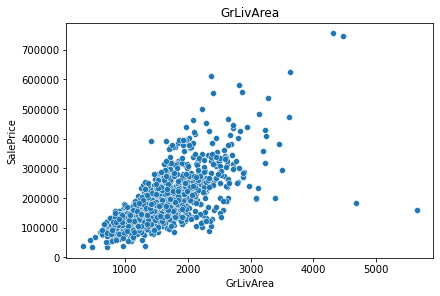

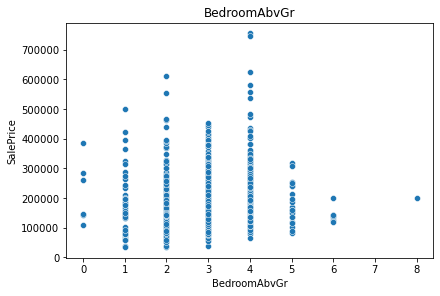

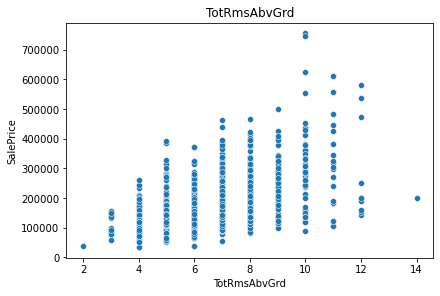

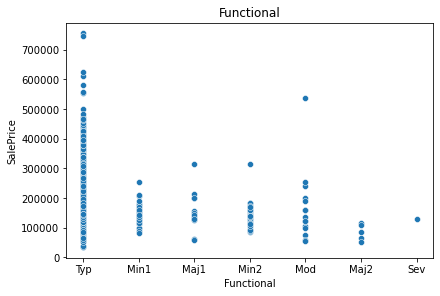

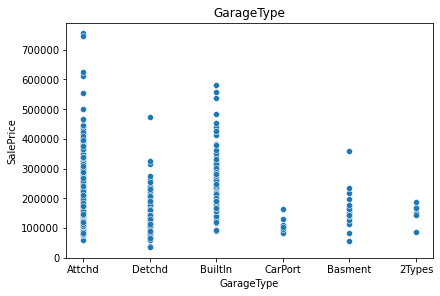

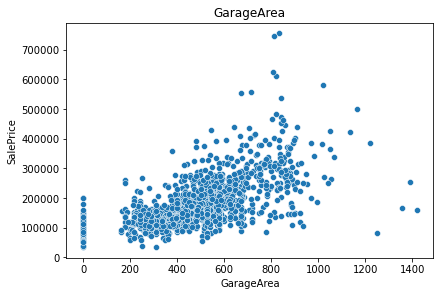

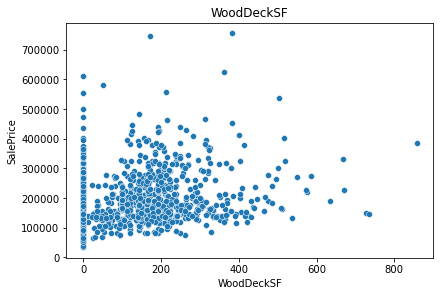

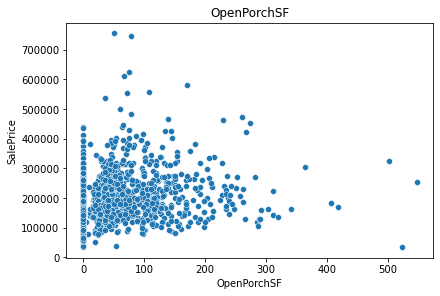

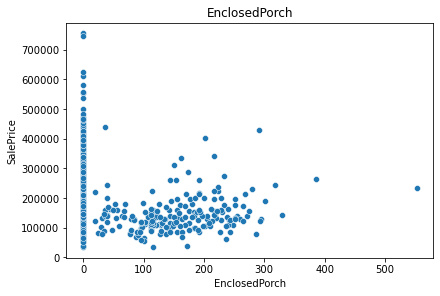

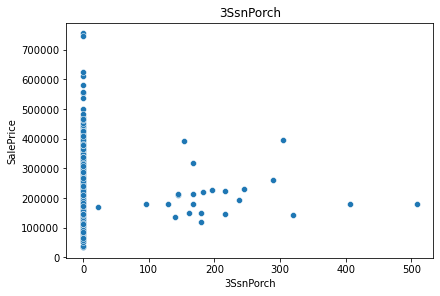

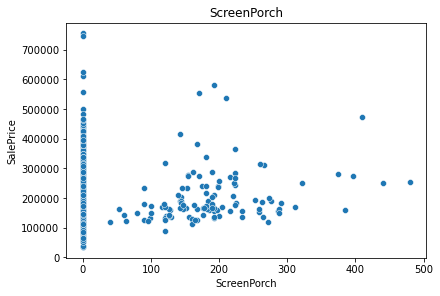

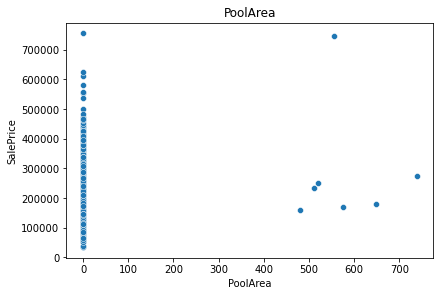

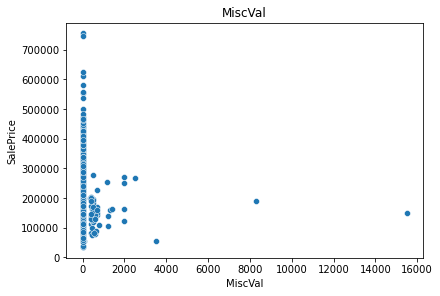

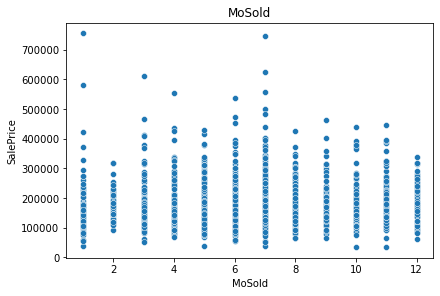

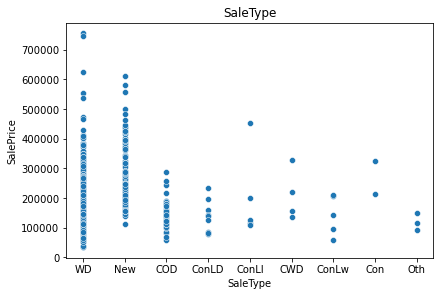

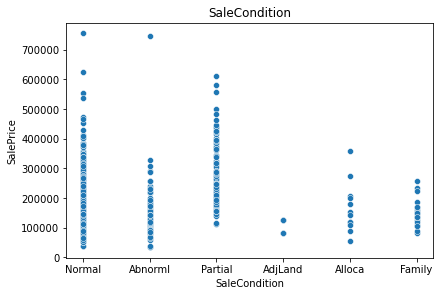

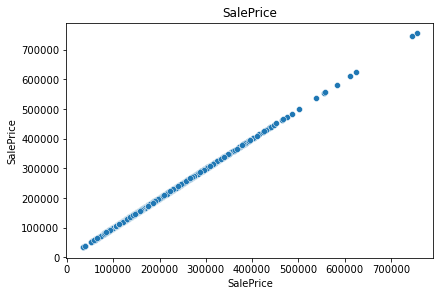

In [15]:
for feat in other_features:
    scatterplot(train_df,feat,"SalePrice")

<span style="color:rgb(255, 77, 77)">As we can see from the graphs: OverallQual, OverallCond, TotRmsAbvGrd, TotalBsmtSF, 1stFlrSF, GrLivArea and GarageArea have stong correlation with SalePrice</span>

#### Let's check the top 10 most correlated features with SalePrice
We will create a heatmap of the top 10 most correlated featers with sale price based on pearson coefficient.

A heatmap is a plot of rectangular data as a color-encoded matrix. As parameter it takes a 2D dataset. That dataset can be coerced into an ndarray. This is a great way to visualize data, because it can show the relation between variabels including time

<AxesSubplot:>

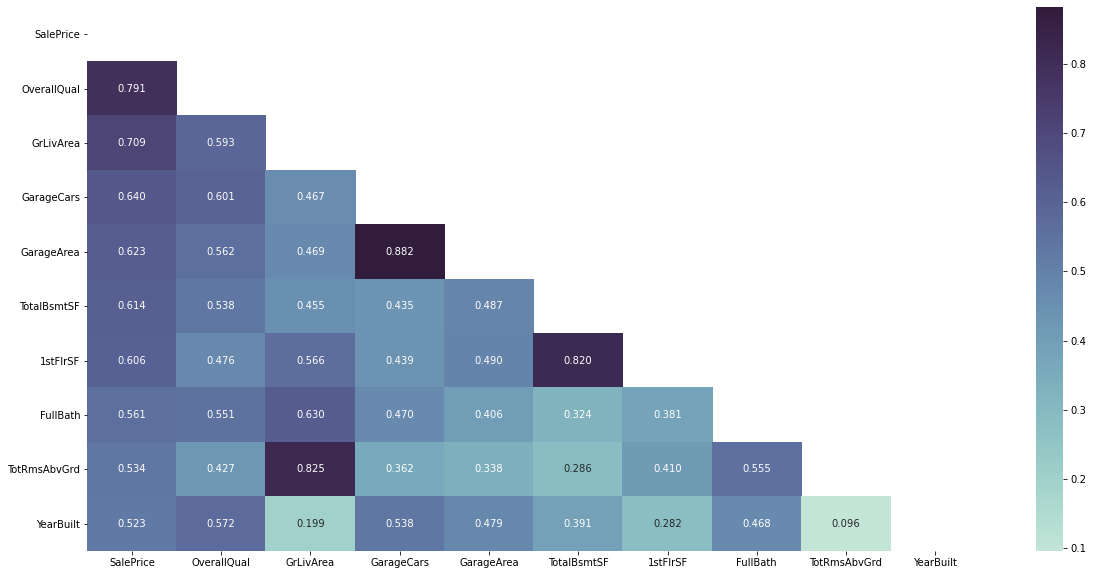

In [16]:
corr_feat = train_df.corr().nlargest(10,"SalePrice")["SalePrice"].index
cmap = np.corrcoef(train_df[corr_feat].values.T)
mask = np.zeros_like(cmap,dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(cmap,
            annot=True,
            fmt=".3f",
            annot_kws = {"size":10},
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
            xticklabels = corr_feat.values,
            yticklabels = corr_feat.values,
            mask=mask)


<span style="color:rgb(255, 77, 77)">As we can see from the heatmap the top 10 most correlated features with SalePrice are: SalePrice, OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt.
We can see that most of the fatures that we observed as a high correlated feature in the scatterplot above are in the top 10 most correlated features with SalePrice.</span>

## <span style="color:rgb(57, 172, 115)">4. Exploratory data analysis</span>

In [17]:
y = train_df["SalePrice"]

In [18]:
all_data = train_df.drop(["SalePrice","Id"],axis=1)

#### check for missing values:

In [19]:
def missing_value(df):
    number = df.isnull().sum().sort_values(ascending=False)
    number = number[number > 0]
    percentage = df.isnull().sum() *100 / df.shape[0]
    percentage = percentage[percentage > 0].sort_values(ascending=False)
    return  pd.concat([number,percentage],keys=["Total","Percentage"],axis=1)
missing_value(all_data)

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


#### Handle missing values:

In [20]:
missing_col = ["Alley", "PoolQC", "MiscFeature","Fence",
               "FireplaceQu","GarageType","GarageFinish",
               "GarageQual","GarageCond",'BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2',
               'MasVnrType']

for col in missing_col:
    all_data[col] = all_data[col].fillna("None") 

LotFrontage, Houses in the same neighborhood would have similar lotfrontage area. 
filling the numerical features with median and mdeidan is the best suited method for numerical based features

In [21]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))
all_data["MasVnrArea"] = all_data.groupby("Neighborhood")["MasVnrArea"].transform(lambda x:x.fillna(x.median()))

Imputing the missing values with the Mode because mode fill the values with the most accuring values and best for the categorical features

In [22]:
all_data["MSZoning"] = all_data.groupby("MSSubClass")["MSZoning"].transform(lambda x: x.fillna(x.mode()[0]))
all_data.loc[all_data["GarageFinish"] == "None" , "GarageYrBlt"] = all_data["YearBuilt"]

#### check again for missing values:

In [23]:
missing_value(all_data)

,Total,Percentage
Electrical,1,0.068493


we can see that we minimized the quantity of missing values, so now we will replace all numerical features with their median, and all categorial features with their mode:

In [24]:
missing_feat = missing_value(all_data).index
missing_cat = [feat for feat in missing_feat if all_data[feat].dtype == np.object]
for feat in missing_cat:
    all_data[feat] = all_data[feat].transform(lambda x: x.fillna(x.mode()[0]))
missing_num = [feat for feat in missing_feat if feat not in missing_cat]
for feat in missing_num:
    all_data[feat] = all_data[feat].transform(lambda x: x.fillna(x.median())) 


checking once more for missing values:

In [25]:
missing_value(all_data)

,Total,Percentage


we will consider months and years as categorial features:

In [26]:
all_data["MoSold"] = all_data["MoSold"].astype(str)
all_data["YrSold"] = all_data["YrSold"].astype(str)
all_data["YearBuilt"] = all_data["YearBuilt"].astype(str)

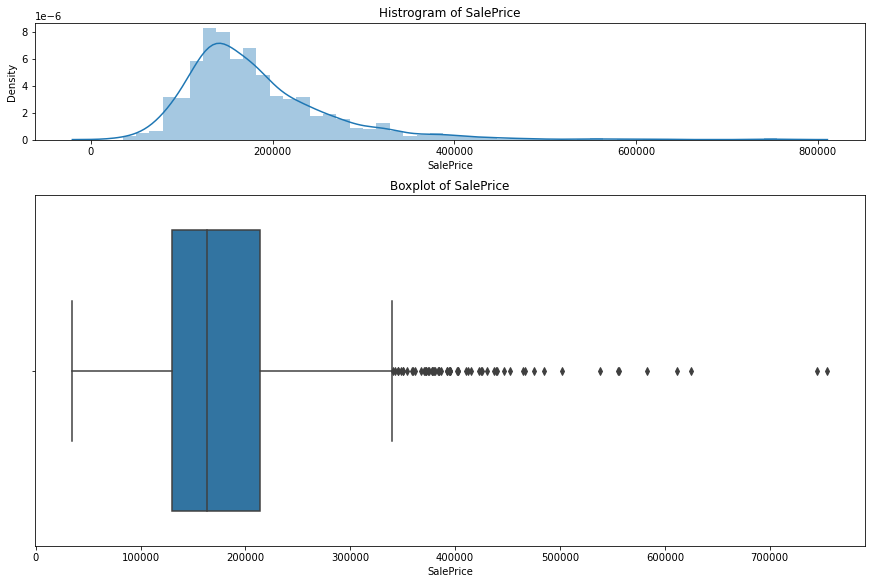

In [27]:
fig = plt.figure(constrained_layout=True, figsize=(12,8))
grid = gridspec.GridSpec(ncols=3, nrows=4, figure=fig)

ax1 = fig.add_subplot(grid[0,:])
sns.distplot(y,ax=ax1)
ax1.set_title("Histrogram of SalePrice")

ax2 = fig.add_subplot(grid[1:,:])
sns.boxplot(y,ax=ax2,orient="v")
ax2.set_title("Boxplot of SalePrice")
plt.show()

<span style="color:rgb(255, 77, 77)">From the above graphs we can see:
1. The SalePrice is right skewed/ postively skewed, which indicates that most people are able to afford lower priced house.
2. There are some mutliple outliers in SalePrice</span>  

Now we will check 2 measures: Skewness and Kurtosis.

Skewness: Defined as the degree of distortion from the symmetrical bell curve or the normal curve.  
Kurtosis: Defined as the measuer of the extreme values (outliers) present.

In [28]:
print("Kurtosis: {}".format(y.kurt()))
print("Skewness: {}".format(y.skew()))

Kurtosis: 6.536281860064529
Skewness: 1.8828757597682129


we will normalize saleprice with natural logarithm plus 1 normalization. with this normalization, a coefficient of 0.06, equals a difference of 1 in x corresponds to an approximate 6% difference in y.

In [29]:
y = np.log1p(y)

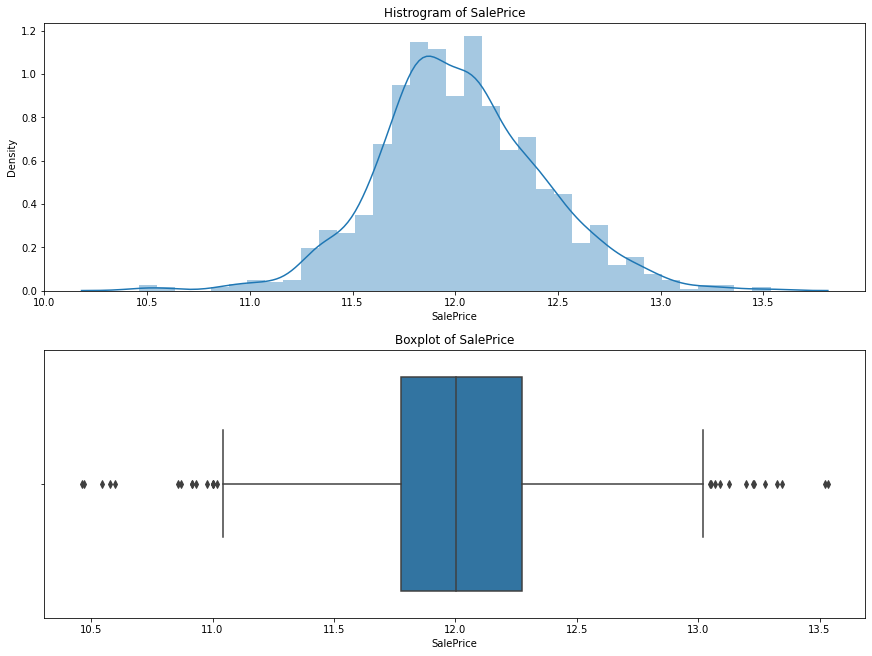

In [30]:
fig,(ax1,ax2) = plt.subplots(2,1,constrained_layout=True,figsize=(12,9))

sns.distplot(y,ax=ax1)
ax1.set_title("Histrogram of SalePrice")

sns.boxplot(y,ax=ax2,orient="v")
ax2.set_title("Boxplot of SalePrice")
plt.show()

In [31]:
print("Kurtosis: {}".format(y.kurt()))
print("Skewness: {}".format(y.skew()))

Kurtosis: 0.809519155707878
Skewness: 0.12134661989685333


## <span style="color:rgb(57, 172, 115)">5. Perform in-depth data analysis</span>

### Feature engineering

Feature engineering is useful to improve the performance of machine learning algorithms and is often considered as applied machine learning

In [32]:
## TotalHouseSF: The total Square Foot of the house
all_data["TotalHouseSF"] = all_data["TotalBsmtSF"] + all_data["1stFlrSF"] + all_data["2ndFlrSF"]

## TotalBath: The total number of bathrooms in the house
all_data["TotalBath"] = all_data["BsmtFullBath"] + all_data["BsmtFullBath"]*0.5 + all_data["FullBath"] + all_data["HalfBath"]*0.5

## TotalPorchSF: The total square foot of porch area of the house
all_data["TotalPorchSF"] = all_data["WoodDeckSF"] + all_data["OpenPorchSF"] + all_data["EnclosedPorch"] + all_data["3SsnPorch"] + all_data["ScreenPorch"]

## HouseRemodAge: Number of years the house being remodded to the time it was sold
all_data["HouseRemodAge"] = all_data["YrSold"].astype(int) - all_data["YearRemodAdd"]
all_data.loc[all_data["HouseRemodAge"] < 0, "HouseRemodAge"] = 0 

Coverting the categorical features into numeric form by applying the get_dummies function

In [33]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)
train_data = all_data

### Splitting the Train data into 70% for training and 30% for testing:
Split the data into training and testing set using scikit-learn train_test_split function. We are using 70% of the data for training and 30% for testing, train_test_split() returns four objects:

X_train: the subset of our features used for training  
X_test: the subset which will be our ‘hold-out’ set – what we’ll use to test the model  
y_train: the target variable SalePrice which corresponds to X_train  
y_test: the target variable SalePrice which corresponds to X_test  

In [34]:
X_train, X_test, y_train, y_test =  train_test_split(train_data,y,test_size=0.33,random_state=42)
print("Shapes of data: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes of data:  (978, 432) (482, 432) (978,) (482,)


### Building the models for training and testing:

we tested 3 models:  
- RandomForestRegressor - A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees.  
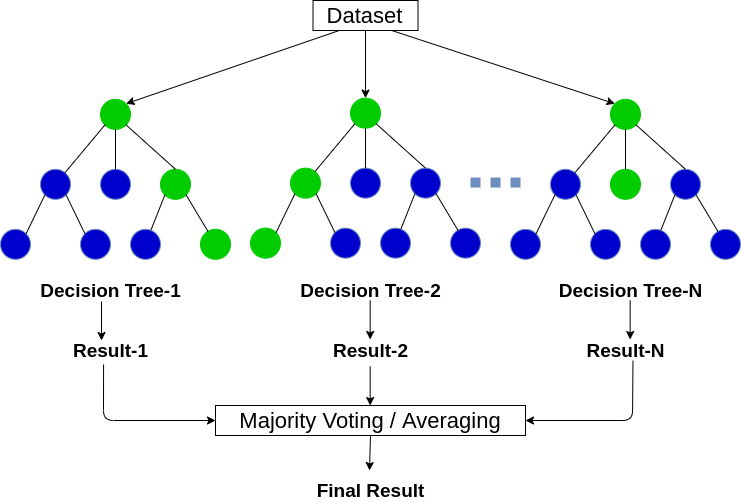

- DecisionTreeRegressor - A decision tree is a flowchart-like structure in which each internal node represents a test on a feature, each leaf node represents a class label and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.  
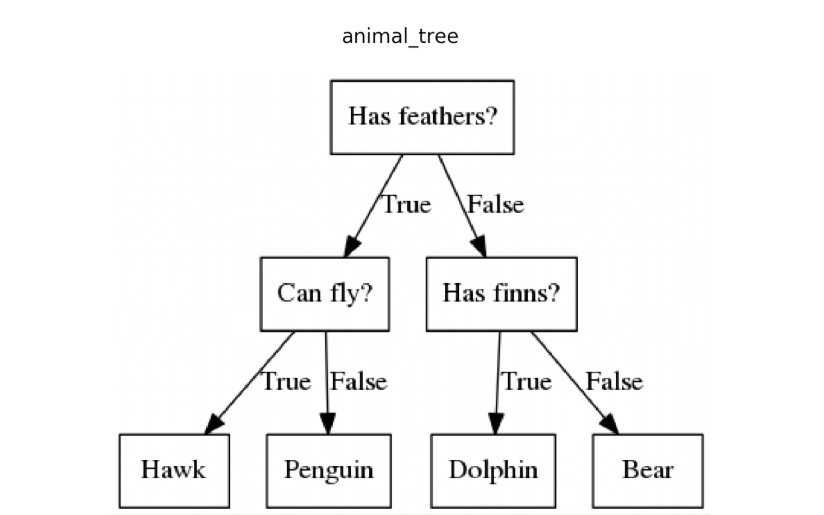

- KNeighborsRegressor - KNeighborsClassifier implements classification based on voting by nearest k-neighbors of target point.  
|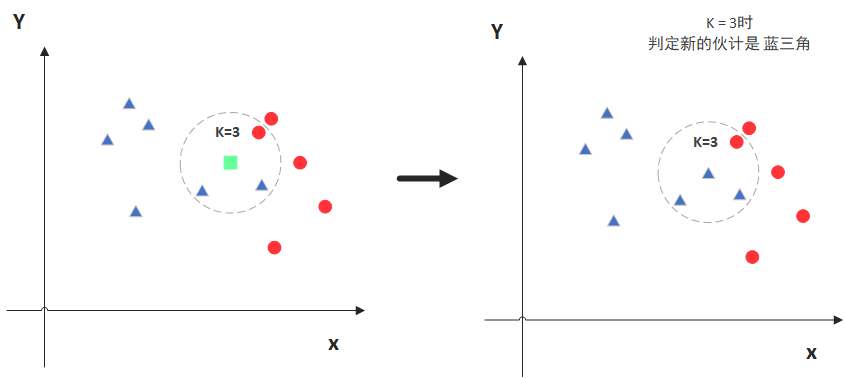


In [35]:
pipeline_models = []

models = [RandomForestRegressor(random_state=42),
          DecisionTreeRegressor(),
          KNeighborsRegressor()]

model_names = ["RFR","DT_Reg","KNN_Reg"]

for name, model in zip(model_names,models):
    pipeline = ("Scaled_"+ name,
                Pipeline([("Scaler",StandardScaler()),
                          (name,model)
                         ]))
    pipeline_models.append(pipeline)
print(pipeline_models)

[('Scaled_RFR', Pipeline(steps=[('Scaler', StandardScaler()),
                ('RFR', RandomForestRegressor(random_state=42))])), ('Scaled_DT_Reg', Pipeline(steps=[('Scaler', StandardScaler()),
                ('DT_Reg', DecisionTreeRegressor())])), ('Scaled_KNN_Reg', Pipeline(steps=[('Scaler', StandardScaler()),
                ('KNN_Reg', KNeighborsRegressor())]))]


### Training the models:

In [36]:
evaluate = pd.DataFrame(columns=["model","cv","std"])

for name,model in pipeline_models:
    cv = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring="r2")
    row = evaluate.shape[0]
    evaluate.loc[row,"model"] = name
    evaluate.loc[row,"cv"] = round(cv.mean(),3)
    evaluate.loc[row,"std"] = "+/- {}".format(round(cv.std(),4))
    
    evaluate = evaluate.sort_values("cv",ascending=False)
evaluate

(0, 3)
(1, 3)
(2, 3)


,model,cv,std
0,Scaled_RFR,0.859,+/- 0.0437
1,Scaled_DT_Reg,0.701,+/- 0.0901
2,Scaled_KNN_Reg,0.688,+/- 0.0357


#### Cross-Validation:
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
-  Take the group as a hold out or test data set
-  Take the remaining groups as a training data set
-  Fit a model on the training set and evaluate it on the test set
-  Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores  

#### R2 Score:
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.  

<img src="images/R-Squared-Formula.jpg" alt="drawing" width="300"/>

#### Vizualization of evaluation:

[Text(0, 0, 'Scaled_RFR'),
 Text(1, 0, 'Scaled_DT_Reg'),
 Text(2, 0, 'Scaled_KNN_Reg')]

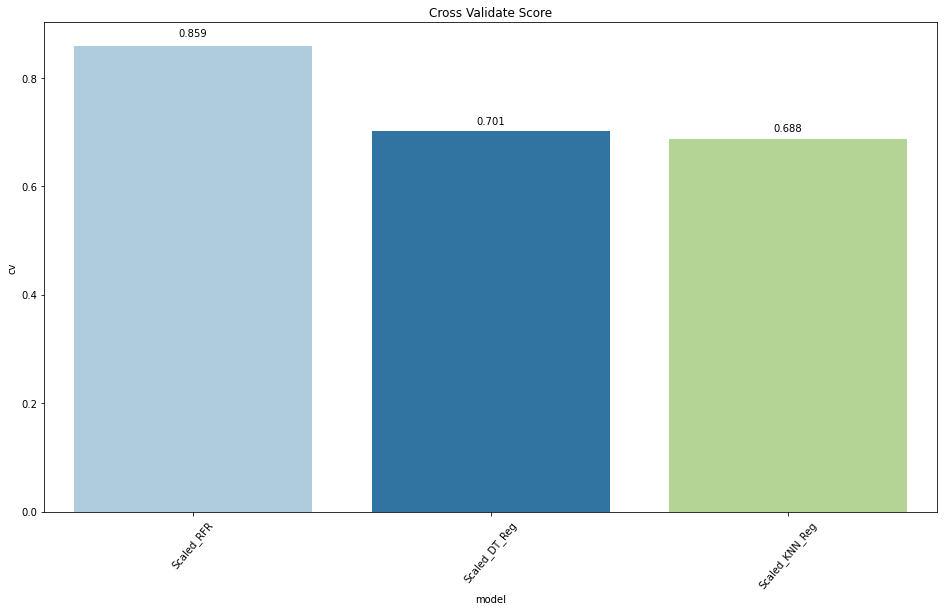

In [51]:
fig, ax = plt.subplots(1,1,sharey=False,figsize=(16,9))

bar = sns.barplot(evaluate["model"], evaluate["cv"],ax=ax,palette = sns.color_palette("Paired", 10))
for rec in bar.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width()/2, height*1.02,height,ha="center")
ax.set_title("Cross Validate Score")
ax.set_xticklabels(evaluate["model"].to_list(),rotation =50)

### <span style="color:rgb(255, 77, 77)">As we can see Random-Forest is the best model !</span>

#### Now we will train our Random Forest model:

In [38]:
final_model = RandomForestRegressor(random_state=42)
final_model = final_model.fit(X_train,y_train)

In [39]:
y_pred=np.floor(np.expm1(final_model.predict(X_test)))
Orig_y_test=np.floor(np.expm1(y_test))
results_df=pd.DataFrame({"Actual sale price":Orig_y_test,"Predicted sale price":y_pred})

In [40]:
results_df

,Actual sale price,Predicted sale price
892,154500.0,140040.0
1105,324999.0,328970.0
413,114999.0,114353.0
522,158999.0,149910.0
1036,315500.0,303639.0
...,...,...
1010,134999.0,113812.0
390,118999.0,124223.0
1409,215000.0,200448.0
847,133500.0,126532.0


<span style="color:rgb(255, 77, 77)">We can see that the "predicted sale price" values are really close to the "Actual sale price" values</span>

#### Scatter plot of the predicted sale prices vs the actual sale prices:

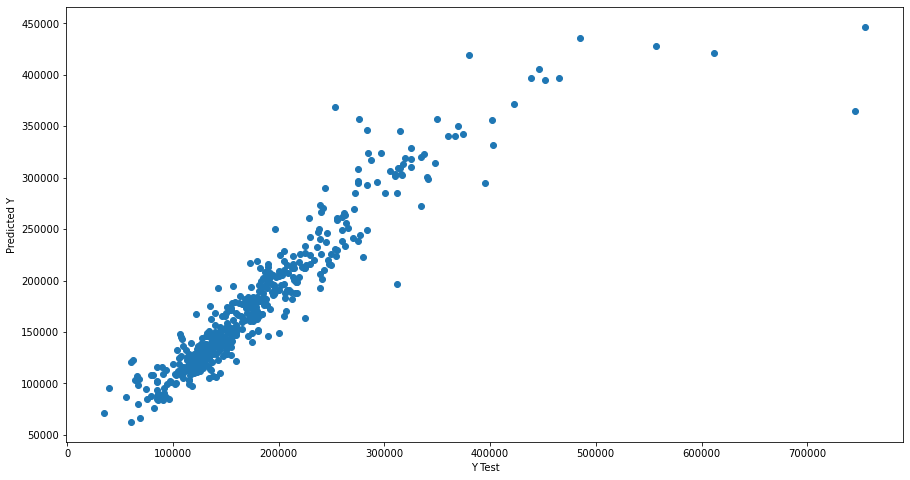

In [41]:
plt.figure(figsize=(15,8))
plt.scatter(Orig_y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<span style="color:rgb(255, 77, 77)">we can see that the dots on the plot are aranged almost in a linear line, so we can conclude that the prediction is accurate.</span>

## <span style="color:rgb(255, 77, 77)">Conclusions:</span>
This project helped us understand more complex models that could be implemented in practical situations.  
We learned how to work with large and complex datasets and the results were very interesting.  
We also learned that you can improve your prediction results a lot by understanding the data you exploring and adjust it so it will fit the best to the classification model.  
In order to get a more accurate predictions we can try other classification algorithms and run again cross-validation over all the classification models, and see if the model imporves the result.  
Hope you enjoyed, like us, from the in-depth analysis of this project.

